In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("C:\\Users\\Admin\\Downloads\\crime.csv")
crimes.head()

,index,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,0,220314085,2022-07-22T00:00:00.000,2020-05-12T00:00:00.000,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,1,222013040,2022-08-06T00:00:00.000,2020-06-04T00:00:00.000,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,2,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,3,231207725,2023-02-27T00:00:00.000,2020-01-27T00:00:00.000,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,4,220213256,2022-07-14T00:00:00.000,2020-07-14T00:00:00.000,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


TIME OCC
1200    550
1       352
800     225
1800    164
1000    161
       ... 
557       1
333       1
134       1
423       1
1927      1
Name: count, Length: 832, dtype: int64
12:00 has the highest frequency of crimes


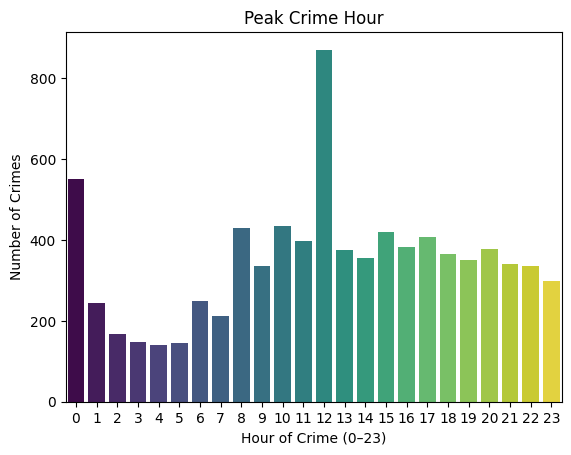

In [19]:
# Printing number of crimes according to time
print(crimes['TIME OCC'].value_counts())

# Safely convert TIME OCC to string, pad with zeros if needed (e.g., 930 → '0930'), then get hour
crimes['hour'] = crimes['TIME OCC'].astype(str).str.zfill(4).str[:2].astype(int)

# Using mode to find most frequent hour
peak_crime_hour = crimes['hour'].mode()[0]

print(f"{peak_crime_hour}:00 has the highest frequency of crimes")

# Creating count plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=crimes, x='hour', hue='hour', palette="viridis", legend=False)
plt.xlabel('Hour of Crime (0–23)')
plt.ylabel('Number of Crimes')
plt.title('Peak Crime Hour')
plt.show()



77th Street area has the largest frequency of night crimes (between 10pm and 3:59am)


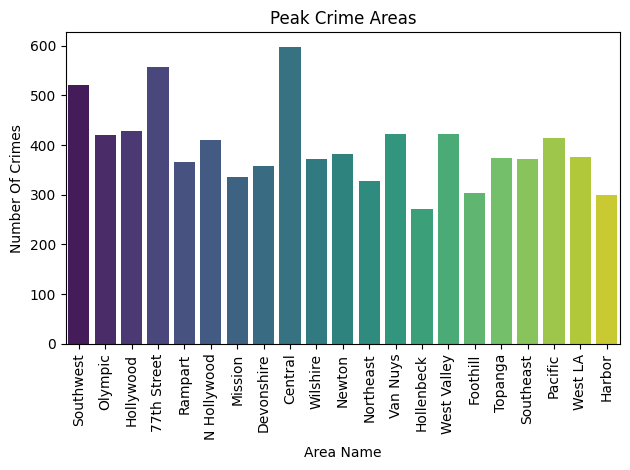

In [29]:
# Filter crimes between 10pm (22) and 3:59am (4)
peak_night_crime_location = crimes[(crimes['hour'] >= 22) | (crimes['hour'] <= 4)]

# Group and find the area with the most crimes in that time range
peak_night_crime_location = (
    peak_night_crime_location
    .groupby("AREA NAME", as_index=False)["hour"]
    .count()
    .sort_values("hour", ascending=False)
    .iloc[0]["AREA NAME"]
)

print(f"{peak_night_crime_location} area has the largest frequency of night crimes (between 10pm and 3:59am)")

# Plotting all area crime counts (clean version)
sns.countplot(data=crimes, x='AREA NAME', hue='AREA NAME', palette="viridis", legend=False)

plt.xticks(rotation=90)
plt.title('Peak Crime Areas')
plt.ylabel('Number Of Crimes')
plt.xlabel('Area Name')
plt.tight_layout()
plt.show()


age_groups
0-17      277
18-25    1272
26-34    1996
35-44    1810
45-54    1292
55-64     998
65+       688
Name: count, dtype: int64


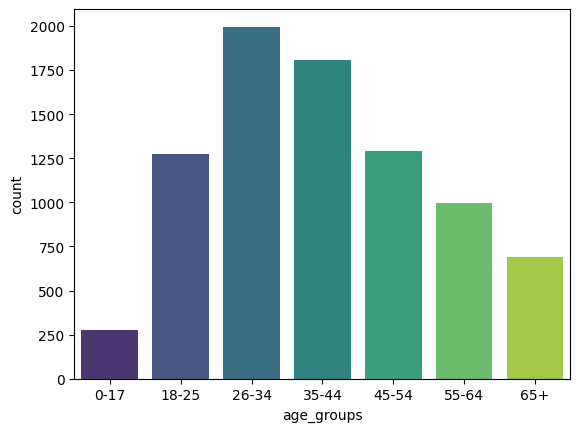

In [31]:
#Identifing the number of crimes committed against victims of different age groups.

bins = [0, 17, 25, 34, 44, 54, 64, float('inf')] #creating bins
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"] #creating labels
crimes['age_groups'] = pd.cut(crimes['Vict Age'],bins= bins,labels=labels,right=True) #assigning labels and bins and setting labels as an index 
victim_ages=crimes['age_groups'].value_counts().sort_index() # counting number of crimes and sorting according to age groups

print(victim_ages)

sns.countplot(data=crimes,x='age_groups',hue='age_groups',order=labels,palette="viridis")
plt.show()

In [32]:
print(crimes['Crm Cd Desc'].value_counts().sort_values(ascending=False).head())


Crm Cd Desc
THEFT OF IDENTITY                                 1967
BATTERY - SIMPLE ASSAULT                           723
BURGLARY FROM VEHICLE                              488
INTIMATE PARTNER - SIMPLE ASSAULT                  459
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     442
Name: count, dtype: int64
